In [ ]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import ppscore as ps
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('adult_with_headers.csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1. Data Exploration & Pre-Processing

In [ ]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Renaming Columns

In [ ]:
df.rename(columns={'education_num' : 'edu_num', 'hours_per_week' : 'hrsper_wk', 'capital_gain' : 'cap_gain', 'capital_loss' : 'cap_loss', 'native_country' : 'native'}, inplace=True)

In [ ]:
df

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Applying StandardScaler to Numerical Columns

In [ ]:
sc = StandardScaler()

scaled = sc.fit_transform(df[['age', 'edu_num', 'hrsper_wk', 'cap_gain', 'cap_loss']])

In [ ]:
scaled

array([[ 0.03038995,  1.13477712, -0.03566374,  0.14829174, -0.21674317],
       [ 0.8369732 ,  1.13477712, -2.22248299, -0.14597544, -0.21674317],
       [-0.0429358 , -0.42067868, -0.03566374, -0.14597544, -0.21674317],
       ...,
       [ 1.42357919, -0.42067868, -0.03566374, -0.14597544, -0.21674317],
       [-1.2161478 , -0.42067868, -1.65552985, -0.14597544, -0.21674317],
       [ 0.9836247 , -0.42067868, -0.03566374,  1.88763548, -0.21674317]])

In [ ]:
min = MinMaxScaler()

scaled_min = min.fit_transform(df[['age', 'edu_num', 'hrsper_wk', 'cap_gain', 'cap_loss']])

In [ ]:
scaled_min

array([[0.30136986, 0.8       , 0.39795918, 0.02174022, 0.        ],
       [0.45205479, 0.8       , 0.12244898, 0.        , 0.        ],
       [0.28767123, 0.53333333, 0.39795918, 0.        , 0.        ],
       ...,
       [0.56164384, 0.53333333, 0.39795918, 0.        , 0.        ],
       [0.06849315, 0.53333333, 0.19387755, 0.        , 0.        ],
       [0.47945205, 0.53333333, 0.39795918, 0.1502415 , 0.        ]])

# In Summary: Usage of both the classes

- Use Standard Scaler when:

  - You want to preserve the shape of the original distribution.
  - You have outliers and don't want them to heavily influence the scaling.
  - Your algorithms assume a Gaussian distribution.

- Use MinMax Scaler when:

  - You need to scale data to a specific range.
  - You have a good understanding of the data's upper and lower bounds.
  - You're using distance-based algorithms.

# 2. Encoding Techniques

In [ ]:
ohe = OneHotEncoder()

In [ ]:
le = LabelEncoder()

In [ ]:
# Finding out columns with less than 5 unique categories for applying OneHotEncoding

# Creating for loop for that
for col in df.columns:
  print(f"Unique values in column '{col}': {df[col].nunique()}")

Unique values in column 'age': 73
Unique values in column 'workclass': 9
Unique values in column 'fnlwgt': 21648
Unique values in column 'education': 16
Unique values in column 'edu_num': 16
Unique values in column 'marital_status': 7
Unique values in column 'occupation': 15
Unique values in column 'relationship': 6
Unique values in column 'race': 5
Unique values in column 'sex': 2
Unique values in column 'cap_gain': 119
Unique values in column 'cap_loss': 92
Unique values in column 'hrsper_wk': 94
Unique values in column 'native': 42
Unique values in column 'income': 2


In [ ]:
# The columns with less than 5 unique values are race, sex, income

# Applying OneHotEncoding
ohe_df =  pd.get_dummies(df, columns=['race', 'sex', 'income'])

In [ ]:
ohe_df.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,cap_gain,cap_loss,...,native,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0


In [ ]:
# Applying Label Encoder to all other Columns with more than 5 unique categories

# Automating the function
le_df = df.copy()

for col in df.columns:
  if df[col].nunique():
    le_df[col] = le.fit_transform(df[col])

In [ ]:
le_df.head()

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


# Encoded The Entire Dataset with LabelEncoder

# Pros & Cons

**LabelEncoder**

**Pros:**

* **Simple:** Easy to implement and understand.
* **Efficient:** Requires less memory and computational resources compared to OneHotEncoder.
* **Suitable for ordinal data:** Preserves the order of categories if they have an inherent order.

**Cons:**

* **Introduces false ordinality:** Assigns arbitrary numerical values to categories, which can mislead models into assuming an order that doesn't exist.
* **May not be suitable for all algorithms:** Some algorithms (like linear regression or distance-based models) might be negatively impacted by the implied ordinal relationship.

**OneHotEncoder**

**Pros:**

* **No false ordinality:** Creates binary columns, avoiding the assumption of an order between categories.
* **Suitable for most algorithms:** Compatible with a wider range of machine learning models.
* **Explicit representation of categories:** Each category is explicitly represented by a separate feature.

**Cons:**

* **Increased dimensionality:** Can significantly increase the number of features, especially with many categories.
* **Higher memory usage:** Requires more memory to store the additional features.
* **Less efficient for large datasets:** Can be computationally more expensive than LabelEncoder.

**Choosing between LabelEncoder and OneHotEncoder:**

* **Use LabelEncoder when:**
    * The categorical variable has an inherent order (e.g., low, medium, high).
    * Memory and computational efficiency are critical.
    * The model can handle ordinal data.

* **Use OneHotEncoder when:**
    * The categorical variable has no inherent order.
    * You want to avoid introducing false ordinality.
    * You are using algorithms that are sensitive to the order of features.

**In summary:**

LabelEncoder is a simpler and more efficient option for ordinal data, while OneHotEncoder is generally more robust and suitable for nominal data and a wider range of machine learning models. The best choice depends on the specific characteristics of your data and the requirements of your machine learning model.


In [ ]:
le_df

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0


# The Label Encoded Data is ready for further analysis.

- Using Label Encoded Data for this purpose, as OHE increases the Dimensions of the data.

# 3. Feature Engineering

In [ ]:
# 3. Feature Engineering:

# Creating a new feature representing total capital (gain - loss)
le_df['total_capital'] = le_df['cap_gain'] - le_df['cap_loss']

# Creating a new feature combining education and hours per week
le_df['education_hours_interaction'] = le_df['edu_num'] * le_df['hrsper_wk']

# Log transformation of 'cap_gain' (assuming it has a skewed distribution)
le_df['cap_gain_log'] = np.log1p(le_df['cap_gain'])

# Display first few rows to inspect the new features
print(le_df.head())

   age  workclass  fnlwgt  education  edu_num  marital_status  occupation  \
0   22          7    2671          9       12               4           1   
1   33          6    2926          9       12               2           4   
2   21          4   14086         11        8               0           6   
3   36          4   15336          1        6               2           6   
4   11          4   19355          9       12               2          10   

   relationship  race  sex  cap_gain  cap_loss  hrsper_wk  native  income  \
0             1     4    1        25         0         39      39       0   
1             0     4    1         0         0         12      39       0   
2             1     4    1         0         0         39      39       0   
3             0     2    1         0         0         39      39       0   
4             5     2    0         0         0         39       5       0   

   total_capital  education_hours_interaction  cap_gain_log  
0           

In [ ]:
le_df

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income,total_capital,education_hours_interaction,cap_gain_log
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0,25,468,3.258097
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0,0,144,0.000000
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0,0,312,0.000000
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0,0,234,0.000000
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0,0,468,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0,0,407,0.000000
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1,0,312,0.000000
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0,0,312,0.000000
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0,0,152,0.000000


<Axes: >

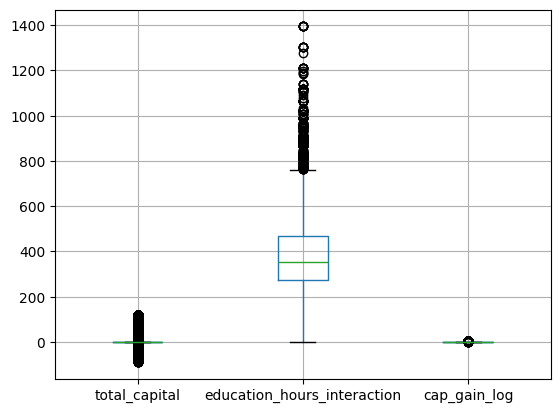

In [ ]:
# Visualization of the new columns

le_df.boxplot(column=['total_capital', 'education_hours_interaction', 'cap_gain_log'])

In [ ]:
# Scaling the 'education_hours_interaction' column for avoiding larger numbers

scaler = StandardScaler()
le_df['education_hours_interaction_scaled'] = scaler.fit_transform(le_df[['education_hours_interaction']])

In [ ]:
le_df

,age,workclass,fnlwgt,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income,total_capital,education_hours_interaction,cap_gain_log,education_hours_interaction_scaled
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0,25,468,3.258097,0.641049
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0,0,144,0.000000,-1.324790
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0,0,312,0.000000,-0.305466
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0,0,234,0.000000,-0.778723
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0,0,468,0.000000,0.641049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39,0,0,407,0.000000,0.270937
32557,23,4,8080,11,8,2,7,0,4,1,0,0,39,39,1,0,312,0.000000,-0.305466
32558,41,4,7883,11,8,6,1,4,4,0,0,0,39,39,0,0,312,0.000000,-0.305466
32559,5,4,12881,11,8,4,1,3,4,1,0,0,19,39,0,0,152,0.000000,-1.276250


In [ ]:
le_df.drop(columns=['education_hours_interaction'], inplace=True)

In [ ]:
# Scaling the 'fnlwgt' column for avoiding larger numbers

scaler = StandardScaler()
le_df['fnlwgt_scaled'] = scaler.fit_transform(le_df[['fnlwgt']])

In [ ]:
le_df.drop(columns=['fnlwgt'], inplace=True)

In [ ]:
le_df.head()

,age,workclass,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income,total_capital,cap_gain_log,education_hours_interaction_scaled,fnlwgt_scaled
0,22,7,9,12,4,1,1,4,1,25,0,39,39,0,25,3.258097,0.641049,-1.294129
1,33,6,9,12,2,4,0,4,1,0,0,12,39,0,0,0.000000,-1.324790,-1.251971
2,21,4,11,8,0,6,1,4,1,0,0,39,39,0,0,0.000000,-0.305466,0.593073
3,36,4,1,6,2,6,0,2,1,0,0,39,39,0,0,0.000000,-0.778723,0.799731
4,11,4,9,12,2,10,5,2,0,0,0,39,5,0,0,0.000000,0.641049,1.464178


# 4. Feature Selection

In [ ]:
# Applying the Isolation Forest Algorithm

# Identify outliers using Isolation Forest
model = IsolationForest()
preds = model.fit_predict(le_df)

# Remove outliers
le_df_no_outliers = le_df[preds == 1]

# Outliers affect model performance in several ways:
# 1. Bias: Outliers can skew model parameters, leading to inaccurate predictions.
# 2. Reduced Accuracy: Outliers can increase the error rate of the model, as the model is trying to fit noisy data.
# 3. Overfitting: Outliers can cause the model to overfit the training data, resulting in poor generalization to unseen data.

print(f"Original DataFrame shape: {le_df.shape}")
print(f"DataFrame shape after outlier removal: {le_df_no_outliers.shape}")

Original DataFrame shape: (32537, 18)
DataFrame shape after outlier removal: (26602, 18)


In [ ]:
le_df_no_outliers['Preds'] = preds[preds == 1]

In [ ]:
le_df_no_outliers

,age,workclass,education,edu_num,marital_status,occupation,relationship,race,sex,cap_gain,cap_loss,hrsper_wk,native,income,total_capital,cap_gain_log,education_hours_interaction_scaled,fnlwgt_scaled,Preds
0,22,7,9,12,4,1,1,4,1,25,0,39,39,0,25,3.258097,0.641049,-1.294129,1
1,33,6,9,12,2,4,0,4,1,0,0,12,39,0,0,0.000000,-1.324790,-1.251971,1
2,21,4,11,8,0,6,1,4,1,0,0,39,39,0,0,0.000000,-0.305466,0.593073,1
3,36,4,1,6,2,6,0,2,1,0,0,39,39,0,0,0.000000,-0.778723,0.799731,1
5,20,4,12,13,2,4,5,4,0,0,0,39,39,0,0,0.000000,0.877677,1.190563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,5,4,15,9,4,11,1,4,1,0,0,39,39,0,0,0.000000,-0.068837,1.332744,1
32556,10,4,7,11,2,13,5,4,0,0,0,37,39,0,0,0.000000,0.270937,0.996800,1
32557,23,4,11,8,2,7,0,4,1,0,0,39,39,1,0,0.000000,-0.305466,-0.399878,1
32558,41,4,11,8,6,1,4,4,0,0,0,39,39,0,0,0.000000,-0.305466,-0.432447,1


# Many Outliers have been removed from the Dataset.

- Let's check the PP Score for the above data.

In [ ]:
# Calculating the PPS & Correlation Matrix

# Calculate the PPS matrix
matrix = ps.matrix(le_df_no_outliers)

# Display the PPS matrix
print(matrix)

# Calculate the correlation matrix
correlation_matrix = le_df_no_outliers.corr()

# Display the correlation matrix
print(correlation_matrix)

# Discussion:
# Compare the PPS matrix and the correlation matrix.
# PPS measures the predictive power of one feature for another, while correlation measures the linear relationship.
# A high PPS score indicates that knowing the value of one feature is helpful in predicting the value of another, even if the correlation is low.
# Conversely, a high correlation doesn't always imply a strong predictive power.
# Analyze features with high PPS scores but low correlations, as these may represent non-linear relationships.
# For example, if 'featureA' has a high PPS for predicting 'target_variable', but a low correlation, it suggests 'featureA' contains useful information for predicting the target, but the relationship is not linear.
# Analyze features with both high PPS and high correlation: These are strong candidates for inclusion in your model.

         x                                   y   ppscore            case  \
0      age                                 age  1.000000  predict_itself   
1      age                           workclass  0.000000      regression   
2      age                           education  0.000000      regression   
3      age                             edu_num  0.000000      regression   
4      age                      marital_status  0.200172      regression   
..     ...                                 ...       ...             ...   
356  Preds                       total_capital  0.000000      regression   
357  Preds                        cap_gain_log  0.000000      regression   
358  Preds  education_hours_interaction_scaled  0.000000      regression   
359  Preds                       fnlwgt_scaled  0.000000      regression   
360  Preds                               Preds  1.000000  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0             

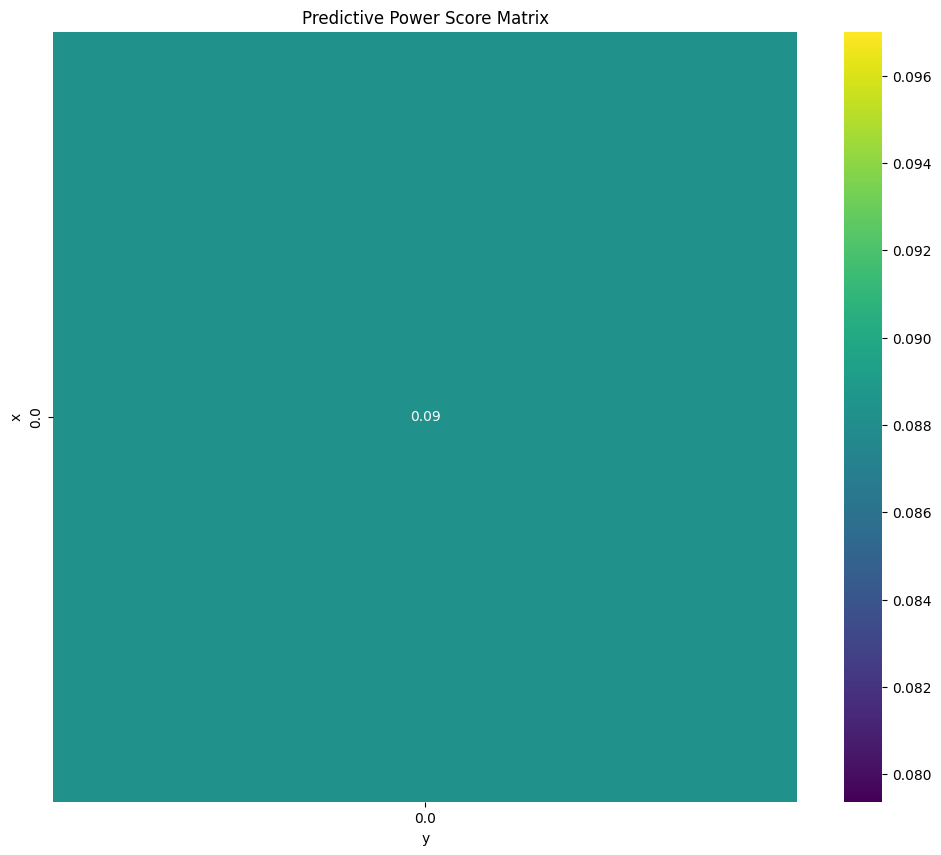

In [ ]:
# Extract only the numeric ppscore values
# Using pivot_table to handle duplicate entries, aggregating with 'mean'
matrix_numeric = matrix.pivot_table(index='x', columns='y', values='ppscore', aggfunc='mean').astype(float)

plt.figure(figsize=(12, 10))
sns.heatmap(matrix_numeric, annot=True, fmt=".2f", cmap="viridis")
plt.title("Predictive Power Score Matrix")
plt.show()

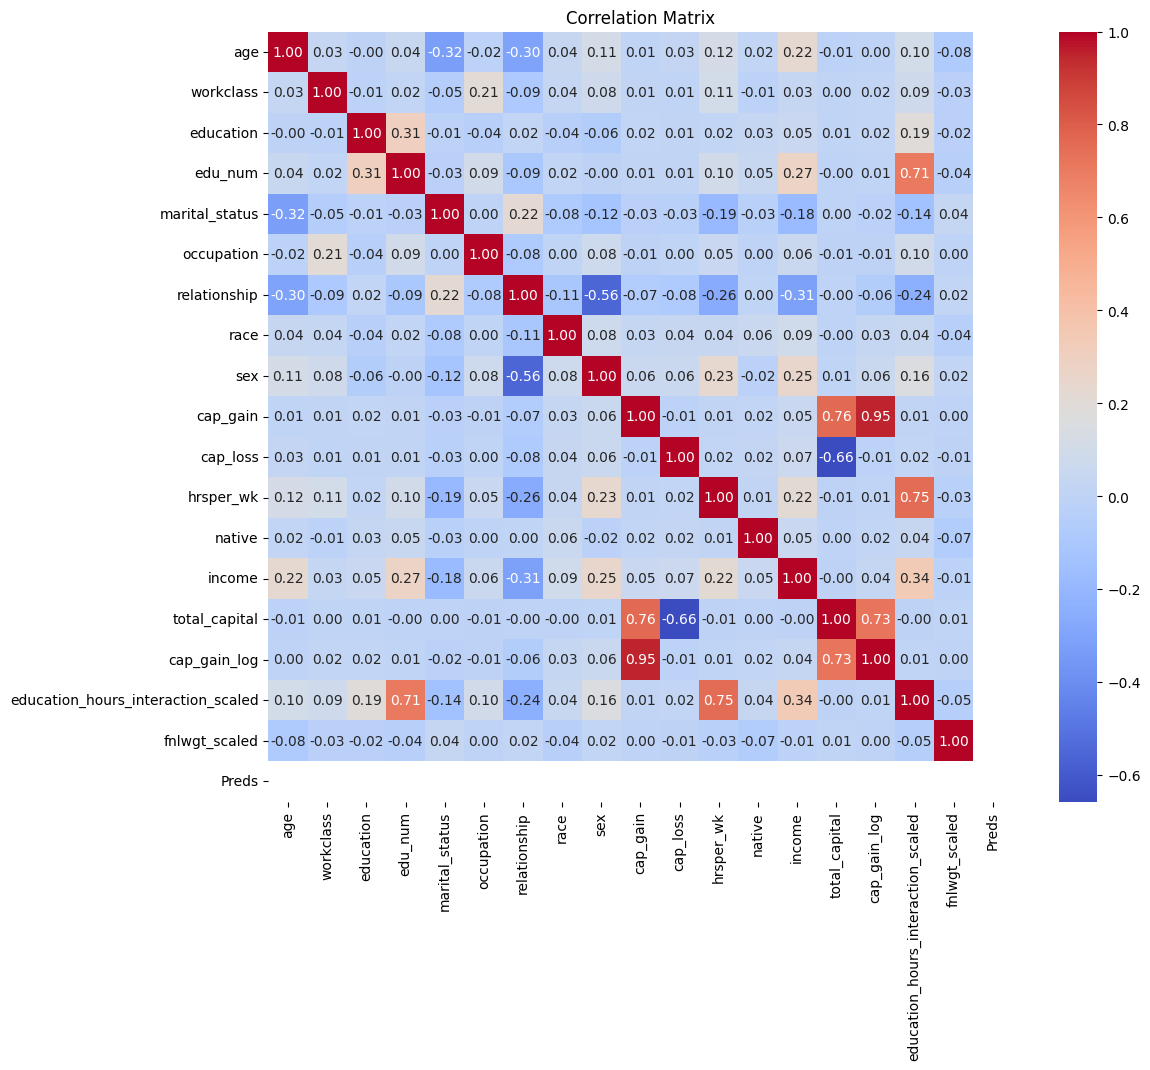

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()